<a href="https://colab.research.google.com/github/PSiriraya/GE234-Basic_Programming/blob/main/Lab1_GE234_Siriraya.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **Lab #1: การจัดการข้อมูลพื้นฐาน**
## **วัตถุประสงค์**
1. เรียนรู้การใช้งาน Python เบื้องต้นสำหรับการจัดการข้อมูล
2. เรียนรู้การใช้ไลบรารีสำคัญ เช่น Pandas และ GeoPandas
3. เรียนรู้การอ่าน/เขียนและสำรวจข้อมูลทางภูมิศาสตร์ (GeoData)

---
หมายเหตุ บางครั้งอาจจะเจอ Bug. ขอจงอย่าย่อท้อ ให้ใช้ทรัพยากรที่มีอยู่ในการจัดการแก้ไขปัญหา เช่น  Gemini หรือ ChatGPT แต่ทั้งนี้ต้องทำความเข้าใจกับคำตอบที่ได้ เพราะบางครั้ง AI ก็ให้คำตอบแบบงงๆ



## **1. การเริ่มต้นใช้งาน Google Colab**
### **1.1 เชื่อมต่อ Google Drive**
ก่อนอื่น ให้เชื่อมต่อ Google Drive เพื่อจัดเก็บข้อมูลของคุณ
    

In [ ]:

from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).



### **1.2 ติดตั้งไลบรารีที่จำเป็น**
ติดตั้งไลบรารีที่จำเป็นสำหรับการจัดการข้อมูลและการวิเคราะห์ข้อมูลภูมิศาสตร์
    

In [ ]:

!pip install pandas geopandas matplotlib



## **2. การจัดการข้อมูลตารางด้วย Pandas**
### **2.1 สร้าง DataFrame ตัวอย่าง**
ลองสร้าง DataFrame ข้อมูลประชากรของประเทศในภูมิภาค ASEAN
    

In [ ]:
import pandas as pd

# สร้าง DataFrame ตัวอย่าง
data = {
    'Country': [
        'Brunei', 'Cambodia', 'Indonesia', 'Laos', 'Malaysia',
        'Myanmar', 'Philippines', 'Singapore', 'Thailand', 'Vietnam'
    ],
    'Population': [
        449002, 16767809, 275501339, 7529475, 33938221,
        54179306, 115559009, 5975689, 71601103, 98186856
    ],
    'Area (sq.km)': [
        5765, 181035, 1904569, 236800, 330803,
        676578, 300000, 710, 513120, 331210
    ]
}
df = pd.DataFrame(data)

# แสดงข้อมูล
print(df)

# คำนวณความหนาแน่นประชากร
df['Density (per sq.km)'] = df['Population'] / df['Area (sq.km)']
print(df)

       Country  Population  Area (sq.km)
0       Brunei      449002          5765
1     Cambodia    16767809        181035
2    Indonesia   275501339       1904569
3         Laos     7529475        236800
4     Malaysia    33938221        330803
5      Myanmar    54179306        676578
6  Philippines   115559009        300000
7    Singapore     5975689           710
8     Thailand    71601103        513120
9      Vietnam    98186856        331210
       Country  Population  Area (sq.km)  Density (per sq.km)
0       Brunei      449002          5765            77.884128
1     Cambodia    16767809        181035            92.621918
2    Indonesia   275501339       1904569           144.652853
3         Laos     7529475        236800            31.796769
4     Malaysia    33938221        330803           102.593450
5      Myanmar    54179306        676578            80.078433
6  Philippines   115559009        300000           385.196697
7    Singapore     5975689           710          841


### **2.2 การอ่านไฟล์ข้อมูล CSV**
- ให้นักศึกษาหาข้อมูลที่น่าสนใจในรูปแบบ  CSV
- โหลด File .csv เข้า google drive ของนักศึกษา
- จากนั้นให้ไปดูใน file_path ในรูป โฟลเดอร์ ด้านซ้ายบน
    

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd # Import the pandas library

# ตัวอย่างการอ่านไฟล์ CSV
file_path = '/content/drive/MyDrive/GE234/data.csv'
geo_df = pd.read_csv(file_path)

# ตรวจสอบข้อมูล
print(geo_df.head())
print(geo_df.info())

   year         region   value                unit                 source
0  2543     ทั่วประเทศ   119.0  คนต่อตารางกิโลเมตร  สำนักงานสถิติแห่งชาติ
1  2553     ทั่วประเทศ   128.6  คนต่อตารางกิโลเมตร  สำนักงานสถิติแห่งชาติ
2  2543  กรุงเทพมหานคร  4051.0  คนต่อตารางกิโลเมตร  สำนักงานสถิติแห่งชาติ
3  2553  กรุงเทพมหานคร  5294.3  คนต่อตารางกิโลเมตร  สำนักงานสถิติแห่งชาติ
4  2543           กลาง   139.0  คนต่อตารางกิโลเมตร  สำนักงานสถิติแห่งชาติ
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    12 non-null     int64  
 1   region  12 non-null     object 
 2   value   12 non-null     float64
 3   unit    12 non-null     object 
 4   source  12 non-null     object 
dtypes: float64(1), int64(1), object(3)
memory usage: 612.0+ bytes
None


**ตอบคำถาม 5 คะแนน**

จงใช้สันชาตญาณนักภูมิศาสตร์ อธิบายข้อมูลที่ได้ ว่าเป็นข้อมูลเกี่ยวกับอะไร

ตอบ ข้อมูลนี้เป็นชุดข้อมูลสถิติที่บันทึกตัวชี้วัดต่างๆ เกี่ยวกับประชากรไทยในแต่ละปี โดยเน้นไปที่พื้นที่ถือครองที่ดินของประเทศ ,  อัตราการเติบโตของประชากร , สัดส่วนประชากรที่อาศัยอยู่ในเขตเมือง


## **3. การจัดการข้อมูลภูมิศาสตร์ด้วย GeoPandas** 5 คะแนน
### **3.1 การอ่าน Shapefile และแสดงผล**
ใช้ข้อมูล Shapefile ที่มีขอบเขตและมีประชากร อาจจะหาจากแหล่งข้อมูลที่ เป็น Opendata เช่น
https://data.humdata.org/dataset/worldpop-population-density-for-thailand

    

   OBJECTID PAYS   PROVINCE      NOMZS  CODEZS         NOMAS    CODEAS  \
0      1054  RDC  NORD KIVU  ALIMBONGO  612302  KASEGHE CBCA  61230208   
1      1055  RDC  NORD KIVU  ALIMBONGO  612302  KASEGHE CBCA  61230208   
2      1016  RDC  NORD KIVU  ALIMBONGO  612302     ALIMBONGO  61230201   
3      1024  RDC  NORD KIVU  ALIMBONGO  612302         BINGI  61230202   
4      1025  RDC  NORD KIVU  ALIMBONGO  612302         BINGI  61230202   

               NOM      CODEHC                       TYPE  EDITE_PAR  \
0       PS KASEGHE  6123020007             POSTE DE SANTE  OMS-DSNIS   
1  CS CBCA KASEGHE  6123020008            CENTRE DE SANTE  OMS-DSNIS   
2     CS ALIMBONGO  6123020009            CENTRE DE SANTE  OMS-DSNIS   
3        CSR BINGI  6123020010  CENTRE SANTE DE REFERENCE  OMS-DSNIS   
4     CS BWATSINGE  6123020011            CENTRE DE SANTE  OMS-DSNIS   

  EDITE_DATE FIABILITE    POINT_X   POINT_Y                 NOMZSAS  \
0 2018-12-29     BASSE  29.166667 -0.500000  ALIMBO

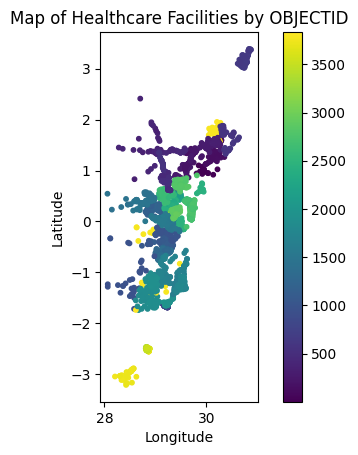

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt # Import matplotlib for plotting utilities

# อ่านไฟล์ Shapefile
shapefile_path = '/content/drive/My Drive/GE234/NK_IT_AOIEbola_StructuresSanitaire_V14.shp'
geo_data = gpd.read_file(shapefile_path)

# แสดงข้อมูลเบื้องต้น
print(geo_data.head())
print(geo_data.crs)

# แสดงผลข้อมูลบนแผนที่ โดยใช้คอลัมน์ 'OBJECTID' ในการกำหนดสี
# เนื่องจากข้อมูลในไฟล์นี้เป็นจุด (POINT) อาจไม่เหมาะกับการใช้ cmap='OrRd' แบบ choropleth
# แต่ใช้เพื่อแสดงการกระจายของ OBJECTID ได้
geo_data.plot(column='OBJECTID', cmap='viridis', legend=True, markersize=10)
plt.title('Map of Healthcare Facilities by OBJECTID')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [ ]:
# รันคำสั่งนี้เพื่อตรวจสอบไฟล์ในโฟลเดอร์ GE234
!ls '/content/drive/MyDrive/GE234/

/content/drive/MyDrive/GE234/tha_admbnda_adm1_rtsd_20190221.gpkg



## **4. การแสดงผลข้อมูล**
### **4.1 สร้างกราฟด้วย Matplotlib**  5 คะแนน
สร้างกราฟแสดงประชากรของแต่ละประเทศในภูมิภาค ASEAN โดยให้นักศึกษาทดลองหาข้อมูลเอง
    

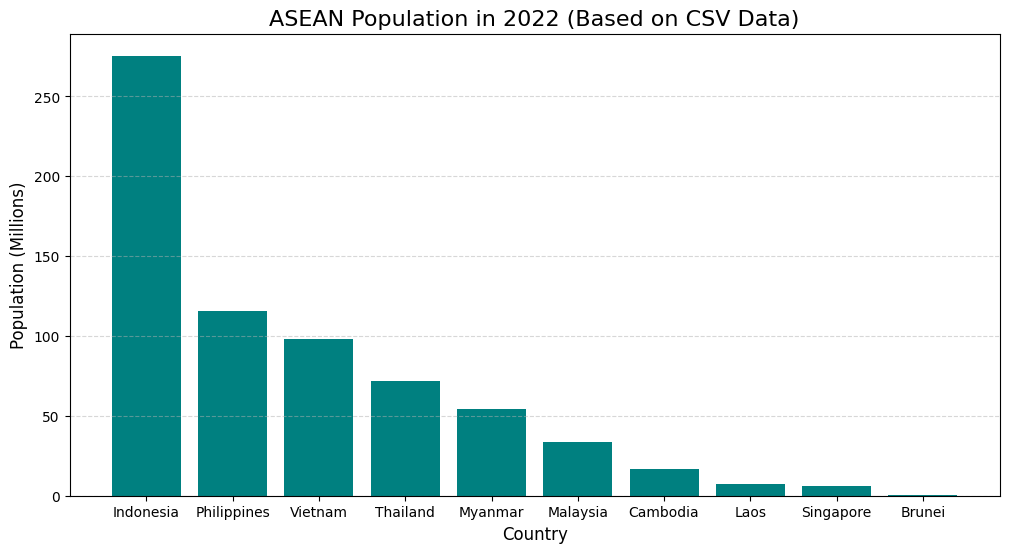

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = '/content/drive/MyDrive/GE234/population.csv'
df = pd.read_csv(file_path)

asean_countries = [
    'Brunei', 'Cambodia', 'Indonesia', 'Laos', 'Malaysia',
    'Myanmar', 'Philippines', 'Singapore', 'Thailand', 'Vietnam'
]

#กรองข้อมูลเฉพาะประเทศในกลุ่มอาเซียน
#ใช้ .isin() เพื่อเลือกแถวที่มีชื่อประเทศอยู่ในลิสต์ asean_countries
df_asean = df[df['Country'].isin(asean_countries)]

df_asean = df_asean.sort_values(by='2022 Population', ascending=False)

plt.figure(figsize=(12, 6))
plt.bar(df_asean['Country'], df_asean['2022 Population'] / 1_000_000, color='teal')

plt.title('ASEAN Population in 2022 (Based on CSV Data)', fontsize=16)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Population (Millions)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.show()


### **4.2 การรวมข้อมูลเชิงพื้นที่และตาราง**
รวมข้อมูล Shapefile กับข้อมูลประชากรเพื่อแสดงข้อมูลประชากรในแต่ละจังหวัด โดยให้นักศึกษาทดลองหาข้อมูลเอง
    

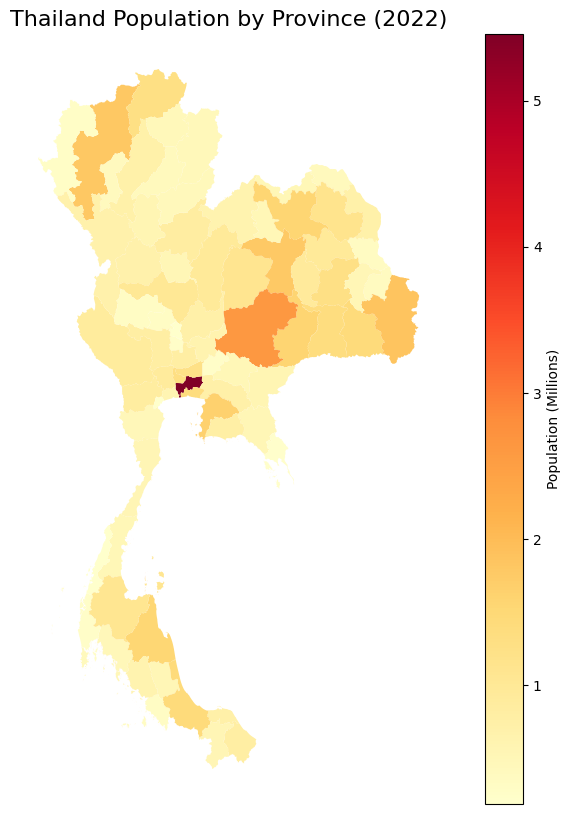

In [ ]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

# 1. อ่านข้อมูล
shapefile_path = '/content/drive/MyDrive/GE234/tha_admbnda_adm1_rtsd_20190221.gpkg'
geo_data = gpd.read_file(shapefile_path)
file_path = '/content/drive/MyDrive/GE234/th.population.csv'
df = pd.read_csv(file_path)

# 2. เตรียมข้อมูลตาราง (Clean Data)
df = df[df['ชื่อจังหวัด'] != 'ทั่วประเทศ'].copy()
df['ประชากร (ล้าน)'] = df['จำนวนประชากรทั้งหมด'].str.replace(',', '').astype(float) / 1_000_000

geo_data['province_join'] = geo_data['ADM1_TH'].str.replace('จังหวัด', '').str.strip()
df['province_join'] = df['ชื่อจังหวัด'].str.replace('จังหวัด', '').str.strip()

# 3. รวมข้อมูล (ตามที่คุณกำหนด)
merged_data = geo_data.merge(df, on='province_join')

# 4. แสดงผลข้อมูลในแผนที่
fig, ax = plt.subplots(1, 1, figsize=(12, 10))

merged_data.plot(column='ประชากร (ล้าน)',
                 cmap='YlOrRd',
                 legend=True,
                 ax=ax,
                 legend_kwds={'label': "Population (Millions)"})

# เปลี่ยนชื่อกราฟเป็นภาษาอังกฤษ
plt.title('Thailand Population by Province (2022)', fontsize=16)

# ปิดแกนพิกัด
plt.axis('off')

plt.show()


## **โจทย์สำหรับนักศึกษา** 15 คะแนน
1. ลองเพิ่มประเทศใหม่ใน DataFrame พร้อมคำนวณความหนาแน่นประชากร (5 คะแนน)
2. นำไฟล์ Shapefile ของพื้นที่อื่นมาแสดงผลใน GeoPandas (5 คะแนน)
3. ลองสร้างแผนที่ด้วยสีที่แตกต่างกันโดยใช้ค่าอื่น เช่น `area` หรือ `density` (5 คะแนน)

---

### **หมายเหตุ**
- ดาวน์โหลดข้อมูลจากแหล่ง Open Data เช่น [World Bank Open Data](https://data.worldbank.org) หรือ [Thailand Data Catalog](https://data.go.th)
- ใส่เครดิตแหล่งข้อมูลในรายงานของคุณ
    

--- 20 European Countries Data ---
               Country  2022 Population  Area (km²)     Density
             Gibraltar          32649.0         6.0 5441.500000
              Guernsey          63301.0        78.0  811.551282
               Belgium       11655930.0     30528.0  381.811124
               Germany       83369843.0    357114.0  233.454424
               Andorra          79824.0       468.0  170.564103
               Denmark        5882261.0     43094.0  136.498376
                Cyprus        1251488.0      9251.0  135.281375
        Czech Republic       10493986.0     78865.0  133.062651
                France       64626628.0    551695.0  117.141950
               Hungary        9967308.0     93028.0  107.143097
               Austria        8939617.0     83871.0  106.587700
               Albania        2842321.0     28748.0   98.870217
                Greece       10384971.0    131990.0   78.679983
               Croatia        4030358.0     56594.0   71.215288
Bosni

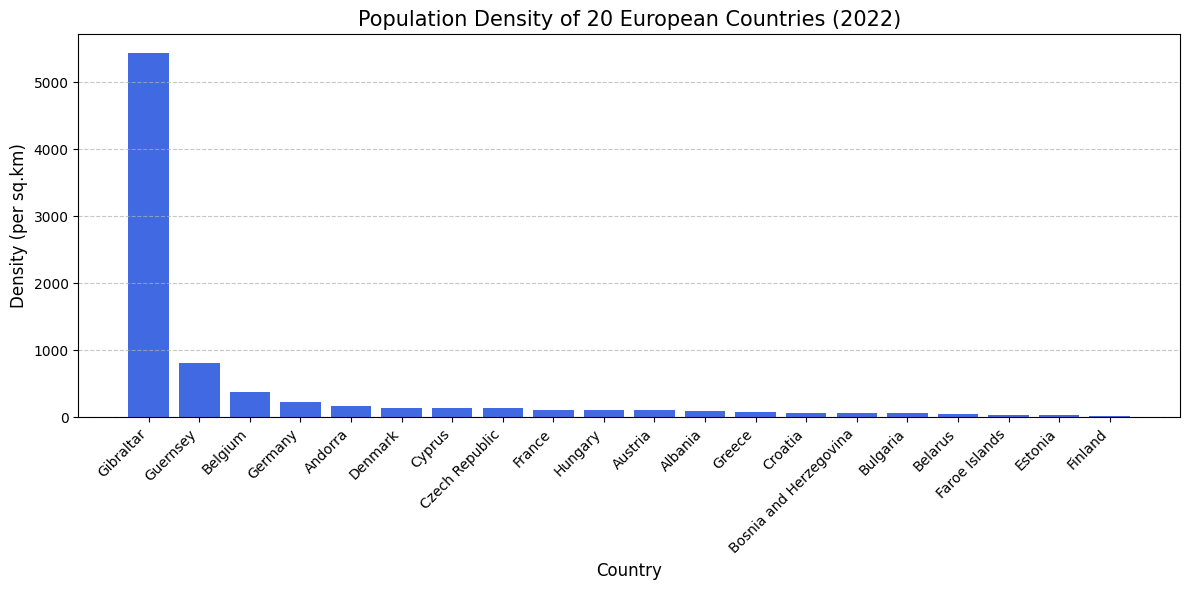

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. อ่านข้อมูลจากไฟล์ (แก้ไข path ตามที่คุณใช้งาน)
# เปลี่ยนจาก 'world_population.csv' เป็น 'population.csv' ที่มีอยู่ใน Drive
file_path = '/content/drive/MyDrive/GE234/population.csv'
df_all = pd.read_csv(file_path)

# 2. กรองข้อมูลเฉพาะทวีปยุโรป (Europe) และเลือกมา 20 ประเทศแรก
# เลือกคอลัมน์ที่จำเป็น: Country, 2022 Population, Area (km²)
df_europe = df_all[df_all['Continent'] == 'Europe'].head(20).copy()

# 3. คำนวณความหนาแน่นประชากร (Density)
# สูตร: Density = Population / Area
df_europe['Density'] = df_europe['2022 Population'] / df_europe['Area (km²)']

# เรียงลำดับจากความหนาแน่นมากไปน้อยเพื่อให้กราฟสวยงาม
df_europe = df_europe.sort_values(by='Density', ascending=False)

# 4. แสดงผลตารางข้อมูล
print("--- 20 European Countries Data ---")
print(df_europe[['Country', '2022 Population', 'Area (km²)', 'Density']].to_string(index=False))

# 5. สร้างกราฟแสดงผล (ใช้ภาษาอังกฤษเพื่อเลี่ยงปัญหาชื่อกราฟไม่ขึ้น)
plt.figure(figsize=(12, 6))
plt.bar(df_europe['Country'], df_europe['Density'], color='royalblue')

plt.title('Population Density of 20 European Countries (2022)', fontsize=15)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Density (per sq.km)', fontsize=12)
plt.xticks(rotation=45, ha='right') # เอียงชื่อประเทศให้อ่านง่าย
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

--- ข้อมูลเบื้องต้น (5 แถวแรก) ---
  id     date_bs    date_ad utc_time  magnitude       epicenter  \
0  1  2081-11-26 2025-03-10    22:26        4.3           Kaski   
1  2  2081-11-24 2025-03-08    00:35        4.1         Baglung   
2  3  2081-11-24 2025-03-08    08:50        5.9  Dinggye, China   
3  4  2081-11-23 2025-03-07    21:29        4.0          Myagdi   
4  5  2081-11-15 2025-02-27    21:06        6.1  Sindhupalchowk   

                                                 uin             geometry  
0  123983984438bbdbf23b601412513958d7429f29897a79...  POINT (84.13 28.28)  
1  fb23ba753264a2850bf124446a06ed13c2c2f37856fee0...  POINT (83.22 28.46)  
2  618ca36f5559e21dfc54f483480a5716afb361eeb7d975...  POINT (87.63 28.42)  
3  fe331f6da839db6a4e3b94eeffed9b6adde8bcbf13dc12...  POINT (83.33 28.53)  
4  2d1911c96bc155de24b0d9268cbc6f70246150313903fe...  POINT (85.88 27.98)  


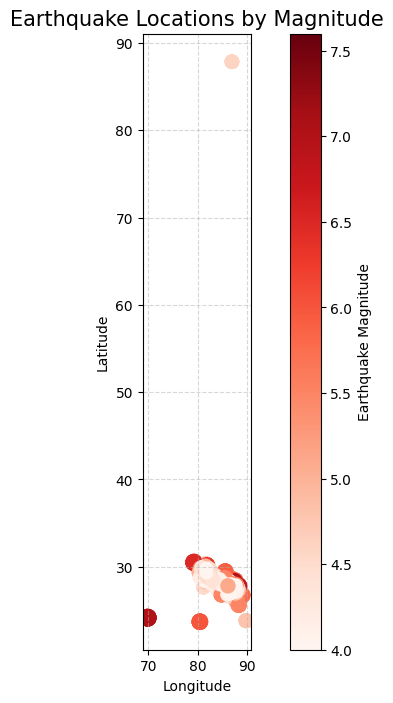

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt # Import matplotlib for plotting utilities

# 1. อ่านไฟล์ข้อมูลเชิงพื้นที่
shapefile_path = '/content/drive/MyDrive/GE234/earthquakes.geojson'
gdf = gpd.read_file(shapefile_path)

# 2. ตรวจสอบข้อมูลเบื้องต้น (Attribute Table)
print("--- ข้อมูลเบื้องต้น (5 แถวแรก) ---")
print(gdf.head())

# 3. แสดงผลแผนที่ (Visualization)
fig, ax = plt.subplots(figsize=(10, 8))

# วาดจุดแผ่นดินไหว โดยปรับสีตาม 'magnitude'
gdf.plot(ax=ax,
         column='magnitude', # ใช้คอลัมน์ magnitude สำหรับกำหนดสี
         cmap='Reds',      # ใช้โทนสี 'Reds' เหมาะกับความรุนแรง
         legend=True,
         markersize=gdf['magnitude']*20, # ปรับขนาดจุดตามความรุนแรงเพื่อให้เห็นความแตกต่าง
         legend_kwds={'label': "Earthquake Magnitude"})

plt.title('Earthquake Locations by Magnitude', fontsize=15)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True, linestyle='--', alpha=0.5)

plt.show()

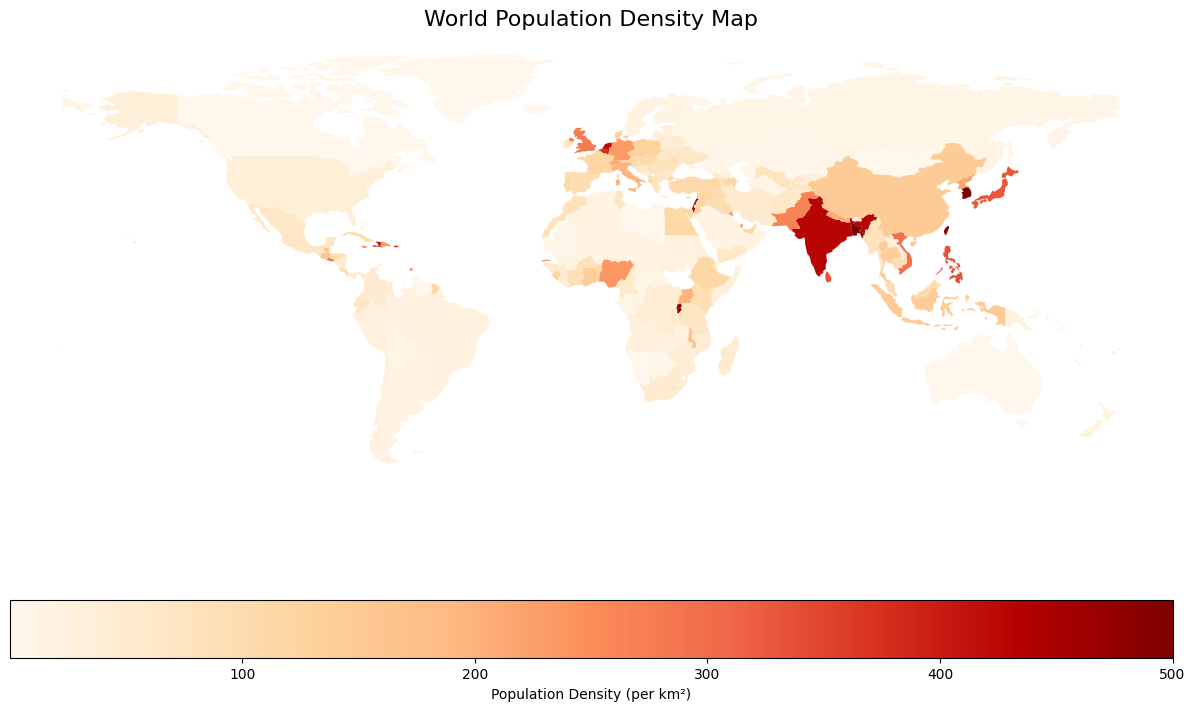

In [ ]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

# 1. อ่านไฟล์แผนที่ประเทศทั่วโลก (.shp)
shapefile_path = '/content/drive/MyDrive/GE234/ne_110m_admin_0_countries.shp'
gdf = gpd.read_file(shapefile_path)

# 2. อ่านไฟล์ข้อมูลประชากร
file_path = '/content/drive/MyDrive/GE234/population.csv'
df_pop = pd.read_csv(file_path)

# 3. รวมข้อมูลแผนที่กับข้อมูลประชากร (ใช้รหัสประเทศ 3 ตัวในการเชื่อม)
# ในไฟล์แผนที่คือ 'ADM0_A3' และในไฟล์ประชากรคือ 'CCA3'
merged = gdf.merge(df_pop, left_on='ADM0_A3', right_on='CCA3', how='left')

# คำนวณความหนาแน่นประชากร (หากยังไม่มีและมีข้อมูลที่จำเป็น)
if '2022 Population' in merged.columns and 'Area (km²)' in merged.columns:
    # จัดการค่าที่เป็นศูนย์ใน 'Area (km²)' เพื่อป้องกันหารด้วยศูนย์
    merged['Area (km²)_clean'] = merged['Area (km²)'].replace(0, pd.NA)
    merged['Density (per km²)'] = merged['2022 Population'] / merged['Area (km²)_clean']
else:
    print("Warning: '2022 Population' or 'Area (km²)' not found in merged DataFrame. Cannot calculate density.")
    merged['Density (per km²)'] = None # ตั้งค่าเป็น None หรือ 0 ตามความเหมาะสม

# 4. สร้างแผนที่ระบายสีตามค่าที่แตกต่างกัน (Density vs Area)
fig, ax = plt.subplots(1, 1, figsize=(15, 10))

# ทดลองระบายสีตามความหนาแน่นประชากร (Density)
if 'Density (per km²)' in merged.columns:
    merged.plot(column='Density (per km²)',
                cmap='OrRd',          # ใช้โทนสีส้ม-แดง (OrRd)
                legend=True,
                vmax=500,             # กำหนดเพดานค่าเพื่อให้เห็นความแตกต่างชัดเจน
                legend_kwds={'label': "Population Density (per km²)", 'orientation': "horizontal"},
                ax=ax)
    plt.title('World Population Density Map', fontsize=16)
    plt.axis('off') # ปิดแกนพิกัด
else:
    plt.title('World Population Density Map (Data Missing)', fontsize=16)
    plt.axis('off')

plt.show()